<a href="https://colab.research.google.com/github/StellarSynapse/Lab_7/blob/main/Lab7_correct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kwant

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for kwant: filename=kwant-1.5.0-cp310-cp310-linux_x86_64.whl size=4195431 sha256=e8a294e06af01ef1952e8ee37b39ab72dd1088654c45fe9c47ad1fd2745bf577
  Stored in directory: /root/.cache/pip/wheels/de/ed/a6/30c685d08edea4ac466fced410ca93fb46e5721a466b743a59
  Created wheel for tinyarray: filename=tinyarray-1.2.4-cp310-cp310-linux_x86_64.whl size=253581 sha256=4cfd81e92ed5dfa851e8a02d2b08496495676d1fb90e7af0d959cd96fe652427
  Stored in directory: /root/.cache/pip/wheels/dc/72/12/09ea11413b527aa3c3a5757ee615ee4d206ee77043a86cbce8
Successfully built kwant tinyarray


In [5]:
!pip install --upgrade matplotlib kwant


In [13]:
import numpy as np
import plotly.graph_objects as go

# Генерація кубоїдної решітки
def generate_cuboid(a=15, b=10, c=5):
    x, y, z = np.meshgrid(
        np.arange(a), np.arange(b), np.arange(c), indexing="ij"
    )
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()
    return x, y, z

# Візуалізація кубоїда за допомогою Plotly
def plot_cuboid(x, y, z, a, b, c):
    colors = ["blue" if z_i % 2 == 0 else "orange" for z_i in z]
    fig = go.Figure(data=go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(size=5, color=colors, opacity=0.8),
    ))
    fig.update_layout(
        scene=dict(
            xaxis=dict(range=[-1, a+1]),
            yaxis=dict(range=[-1, b+1]),
            zaxis=dict(range=[-1, c+1]),
        ),
        title="3D Visualization of Cuboid Lattice",
    )
    fig.show()

# Основна функція
def main():
    # Генерація великого кубоїда
    a, b, c = 15, 10, 5
    x, y, z = generate_cuboid(a, b, c)
    plot_cuboid(x, y, z, a, b, c)

    # Генерація меншого кубоїда
    a, b, c = 5, 5, 5
    x, y, z = generate_cuboid(a, b, c)
    plot_cuboid(x, y, z, a, b, c)

# Виконання
if __name__ == "__main__":
    main()



<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



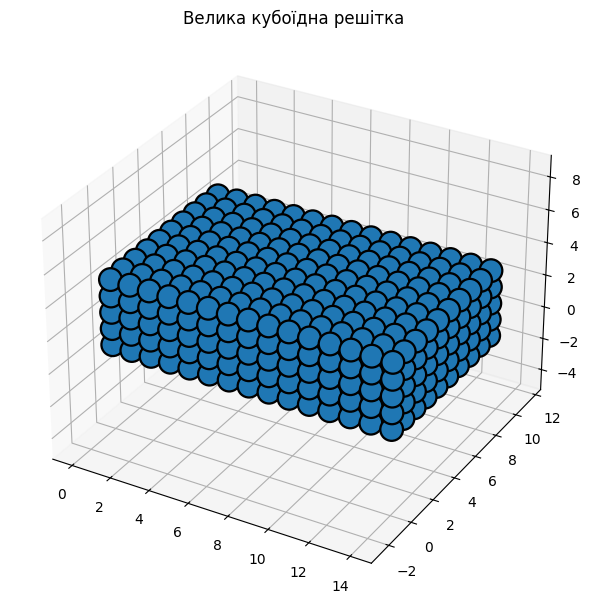

In [5]:
import kwant
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Додатковий модуль для 3D-візуалізації

# Визначення простої кубічної гратки
lat = kwant.lattice.general(
    [(1, 0, 0), (0, 1, 0), (0, 0, 1)],  # Кубічні трансляції
    [(0, 0, 0)],  # Один атом у вузлі
    norbs=1  # Одна орбіталь на сайт
)

def create_cuboid_lattice(a, b, c):
    """
    Створює кубоїдну гратку.

    Parameters:
        a, b, c: Розміри кубоїда уздовж x, y, z.

    Returns:
        sys: Система на основі кубоїдної гратки.
    """
    def cuboid_shape(pos):
        x, y, z = pos
        return 0 <= x < a and 0 <= y < b and 0 <= z < c

    # Будівельник для гратки
    sys = kwant.Builder()
    sys[lat.shape(cuboid_shape, (0, 0, 0))] = 0  # Додаємо сайти
    sys[lat.neighbors()] = -1  # Додаємо зв'язки між сусідніми сайтами
    return sys

def visualize_lattices(system1):
    """
    Візуалізує дві системи.

    Parameters:
        system1: Перша система (велика решітка).
        system2: Друга система (менша решітка).
    """
    fig = plt.figure(figsize=(12, 6))

    # Додаємо тривимірні осі для першої системи
    ax1 = fig.add_subplot(121, projection="3d")
    kwant.plot(system1, site_lw=0.1, hop_lw=0.05, ax=ax1, show=False)
    ax1.set_title("Велика кубоїдна решітка")



    plt.tight_layout()
    plt.show()

def main():
    """
    Основна функція для створення та візуалізації двох кубоїдних решіток.
    """
    # Розміри для двох решіток
    large_dimensions = {'a': 15, 'b': 10, 'c': 5}


    # Створення двох систем
    large_system = create_cuboid_lattice(**large_dimensions)


    # Візуалізація двох систем
    visualize_lattices(large_system)

# Виконання основної програми
if __name__ == "__main__":
    main()





/usr/local/lib/python3.10/dist-packages/kwant/_plotter.py:420: MatplotlibDeprecationWarning:

The proj_transform_clip function was deprecated in Matplotlib 3.10 and will be removed in 3.12.

/usr/local/lib/python3.10/dist-packages/kwant/_plotter.py:476: MatplotlibDeprecationWarning:

The proj_transform_clip function was deprecated in Matplotlib 3.10 and will be removed in 3.12.



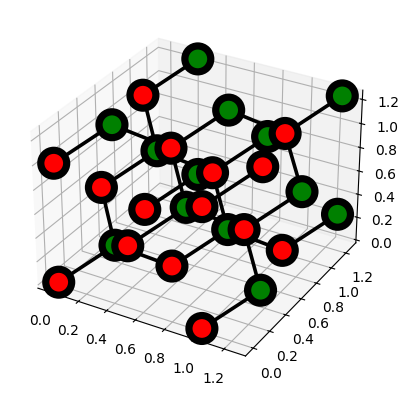

In [7]:
import kwant
import matplotlib.pyplot as plt

lat = kwant.lattice.general(
    [(0, 0.5, 0.5), (0.5, 0, 0.5), (0.5, 0.5, 0)],
    [(0, 0, 0), (0.25, 0.25, 0.25)],
    norbs=1  # Задаємо кількість орбіталей
)

a, b = lat.sublattices

def make_cuboid(a=15, b=10, c=5):
    def cuboid_shape(pos):
        x, y, z = pos
        return 0 <= x < a and 0 <= y < b and 0 <= z < c

    sys = kwant.Builder()
    sys[lat.shape(cuboid_shape, (0, 0, 0))] = None
    sys[lat.neighbors()] = None
    return sys

def main():


    sys = make_cuboid(a=1.5, b=1.5, c=1.5)

    def family_colors(site):
        return "r" if site.family == a else "g"

    kwant.plot(
        sys,
        site_size=0.18,
        site_lw=0.1,
        hop_lw=0.05,
        site_color=family_colors,
    )

if __name__ == "__main__":
    main()
